# Runtimeanalysis for Metro dataset

In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
import glob
from math import sqrt
from math import log2
# packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.regression_plotfunctions import *



In [60]:
def plot_CV_with_Std(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    kmax  = np.max(df["k"])
    list_k = np.linspace(1, kmax, num=kmax)
    std_list = np.zeros(kmax)
    mean_list = np.zeros(kmax)
    for k in list_k:
        df_tmp = df[df["k"] == k]
        std_list[int(k-1)] = np.std(df_tmp[y])
        mean_list[int(k-1)] = np.mean(df_tmp[y])
    plt.semilogy(list_k, mean_list, '-', label = regressor)
    plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend(loc="center right")
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    if SaveName:
        plt.savefig(SaveName)

            
            

In [3]:
def plot_TTS(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    plt.plot(df, mean_list, '-', label = regressor)
    #plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend()
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    if SaveName:
        plt.savefig(SaveName)

## SGD

In [4]:
df_CV_SGD_raw = pd.read_csv("out/SGD/sklearn_CV_SGD_raw.csv")
df_CV_my_SGD_raw = pd.read_csv("out/SGD/my_CV_SGD_raw.csv")
df_CV_SGD_transforamtion = pd.read_csv("out/SGD/sklearn_CV_SGD_transforamtion.csv")
df_CV_my_SGD_transforamtion = pd.read_csv("out/SGD/my_CV_SGD_transforamtion.csv")

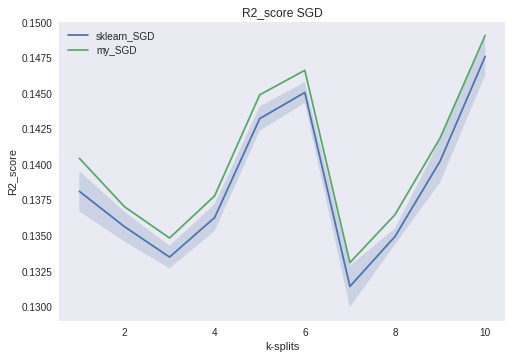

In [5]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_raw")

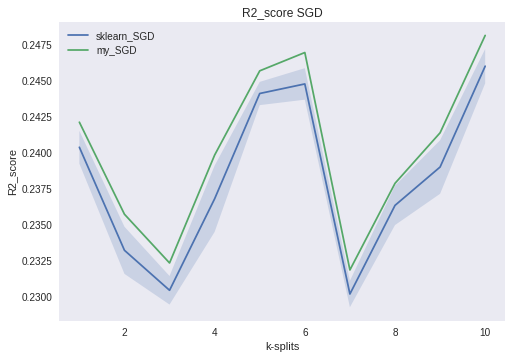

In [6]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_transforamtion")

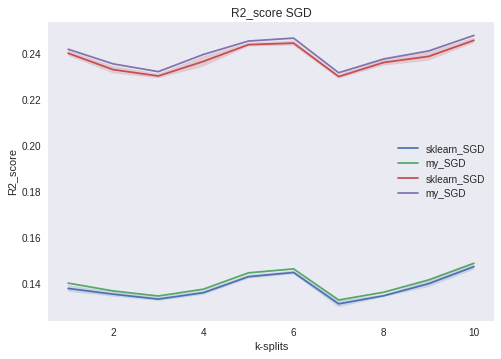

In [7]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="CV Plot")
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2")

## KNN

In [8]:
df_CV_KNN_transforamtion = pd.read_csv("out/KNN/sklearn_CV_KNN_transformation.csv")
df_CV_KNN_raw = pd.read_csv("out/KNN/sklearn_CV_KNN_raw.csv")
df_CV_my_KNN_transforamtion = pd.read_csv("out/KNN/my_CV_KNN_transformation.csv")
df_CV_my_KNN_raw = pd.read_csv("out/KNN/my_CV_KNN_raw.csv")

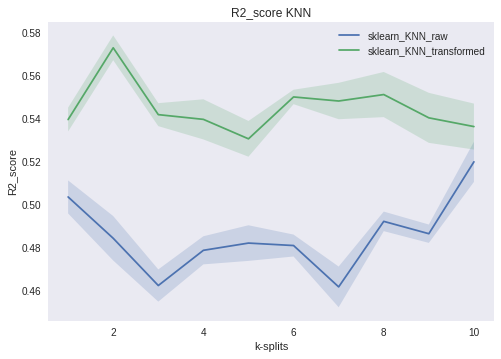

In [9]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_KNN_raw,y = "R2_score",regressor = "sklearn_KNN_raw",titel="R2_score KNN")
plot_CV_with_Std(df_CV_KNN_transforamtion,y = "R2_score",regressor = "sklearn_KNN_transformed",titel="R2_score KNN")
plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_KNN_R2")

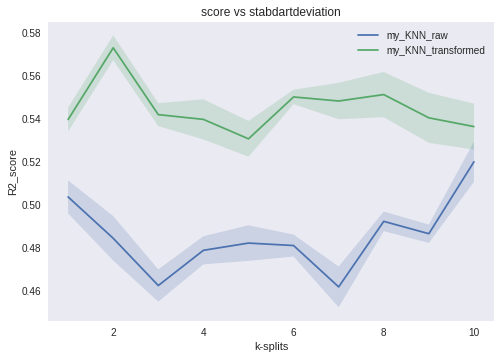

In [10]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_my_KNN_raw,y = "R2_score",regressor = "my_KNN_raw",titel="R2_score myKNN")
plot_CV_with_Std(df_CV_my_KNN_transforamtion,y = "R2_score",regressor = "my_KNN_transformed")

plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_myKNN_R2")

## RM-sklearn

In [11]:
df_CV_RF_transforamtion = pd.read_csv("out/RF/sklearn_CV_RF_transforamtion.csv")
df_CV_RF_raw = pd.read_csv("out/RF/sklearn_CV_RF_raw.csv")

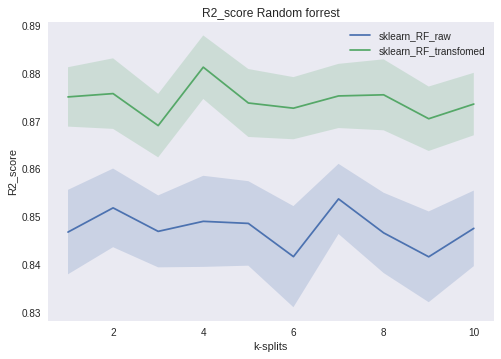

In [12]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_RF_raw,y = "R2_score",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_RF_transforamtion,y = "R2_score",regressor = "sklearn_RF_transfomed",titel="R2_score Random forrest")
plt.grid()
plt.savefig("out/RF/CV_Plot_sklearn_RF_R2")

## DT-sklearn

In [13]:
df_CV_DT_transforamtion = pd.read_csv("out/DT/sklearn_CV_DT_transforamtion.csv")
df_CV_DT_raw = pd.read_csv("out/DT/sklearn_CV_DT_raw.csv")

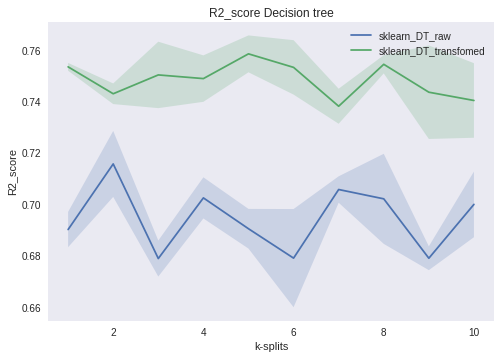

In [14]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_DT_raw,y = "R2_score",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_DT_transforamtion,y = "R2_score",regressor = "sklearn_DT_transfomed",titel="R2_score Decision tree")
plt.grid()
plt.savefig("out/DT/CV_Plot_sklearn_DT_R2")

## runtime

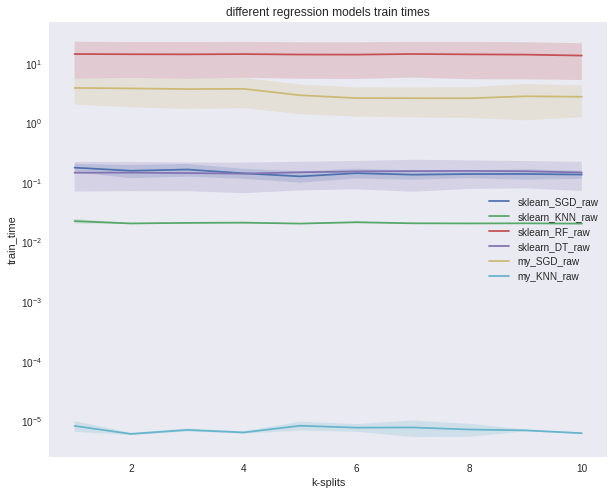

In [70]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
plot_CV_with_Std(df_CV_SGD_raw,y = "train_time",regressor = "sklearn_SGD_raw")
plot_CV_with_Std(df_CV_KNN_raw,y = "train_time",regressor = "sklearn_KNN_raw")
plot_CV_with_Std(df_CV_RF_raw,y = "train_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "train_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "train_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "train_time",regressor = "my_KNN_raw",titel="different regression models train times")
plt.grid()
plt.savefig("out/runtimes/diff_traintimes")


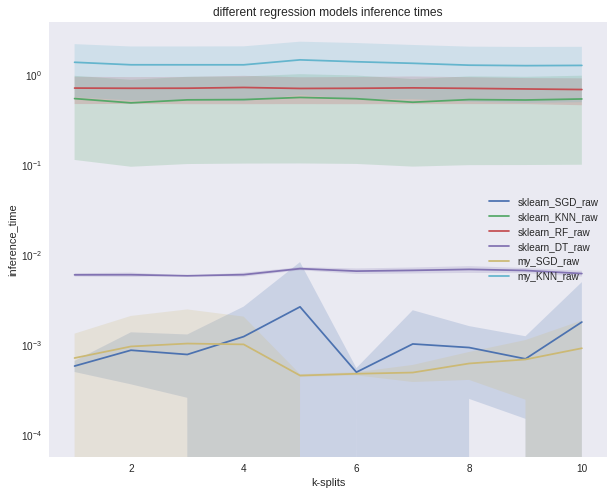

In [71]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
plot_CV_with_Std(df_CV_SGD_raw,y = "inference_time",regressor = "sklearn_SGD_raw")
plot_CV_with_Std(df_CV_KNN_raw,y = "inference_time",regressor = "sklearn_KNN_raw")
plot_CV_with_Std(df_CV_RF_raw,y = "inference_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "inference_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "inference_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "inference_time",regressor = "my_KNN_raw",titel="different regression models inference times")
plt.grid()
plt.savefig("out/runtimes/diff_inferencetimes")